<a href="https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/notebookes/TrainNeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- ![](animation.gif) -->

***Author: Amineh Dadasetan***

# Introduction
In Previous [article](https://nbviewer.org/github/aminehd/AminehTechnicalWritings/blob/main/notebookes/NeuralNetWriting.ipynb#) I talked about classifier neural networks, specefically their feed forward and backward.

The reason we need feed backward is to run *Gradient decent* algorithm. The idea about Gradiant decent is that it moves the parameters and output of layers to such a small amount.
$$
W^{[i]} = W^{[i]} - α * dW^{[i]}
$$
Thus if we could plot the output of at each round of Gradient decent update, we could hopefully see a continious motion.
For this I follow 3 steps:
1. Generate 2-dimensional input $x$ that can be class 0 or class 1.
2. Create a tensorflow Sequential model.
3. Train the model with data for 200 epoches and plot the decision boundary after each epoch.
4. I finally put those plots together and generate a gif.


## Helper functions

In [2]:
import google.colab
repo_path = 'AminehTechnicalWritings'
!git -C $repo_path pull origin || git clone https://github.com/aminehd/AminehTechnicalWritings/ $repo_path
local_clone = '/content/' + repo_path
!git config --global user.email "amineh.dadsetan@gmail.com"
!git config --global user.name "Amineh Dadsetan"
%load_ext autoreload
%autoreload 2
# Import utility functions that provide answers to challenges
%load_ext autoreload


import sys
sys.path.insert(1, '/content/AminehTechnicalWritings/src')

from Helper import *
# from Helper import *

Already up to date.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate input data

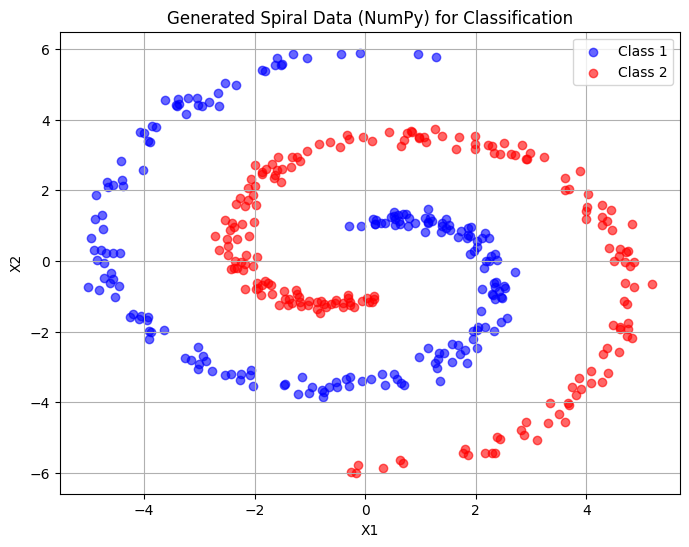

In [3]:

# Generate the spiral data with NumPy
n_points_per_class = 200
X, y = generate_spiral_numpy(n_points_per_class)

# Visualize the NumPy-generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 1', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 2', alpha=0.6)
plt.title('Generated Spiral Data (NumPy) for Classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


## Create a Neural net

In [ ]:
folder_name = "decision_boundary_images"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
X_transformed = transform_features(X)

# Create the model
model = Sequential()
model.add(Dense(7, input_dim=7, activation='sigmoid'))  # First hidden layer with 7 nodes
model.add(Dense(2, activation='sigmoid'))               # Second hidden layer with 2 nodes
model.add(Dense(1, activation='sigmoid'))            # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.007), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model and save the decision boundary image at each epoch
epochs = 200
for epoch in range(epochs):
    model.fit(X_transformed, y, epochs=1, verbose=0)
    plot_decision_boundary(X, y, model, epoch + 1)

Now you can view the GIF :)

![](https://github.com/aminehd/AminehTechnicalWritings/blob/main/notebookes/learning_algo_sigmoid.gif?raw=1)



You could also change the hyperparameters and see how the animation changes.

You can compare it with the classes in the input data and see it resembles the shape of data. So we can use another data and checkout the animation again :)


![](https://github.com/aminehd/AminehTechnicalWritings/blob/main/notebookes/classifier_learning.gif?raw=1)

I found the inpiration from [this playground](https://playground.tensorflow.org/#activation=relu&batchSize=1&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=10&networkShape=7,2&seed=0.93504&showTestData=false&discretize=false&percTrainData=50&x=false&y=false&xTimesY=true&xSquared=false&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false)

:)

## Appendix

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import os

import numpy as np
import matplotlib.pyplot as plt

# Function to generate spiral data using NumPy
def generate_spiral_numpy(n_points_per_class, noise=0.2):
    X = []
    y = []
    for class_number in range(2):
        radius = np.linspace(1, 6, n_points_per_class)
        theta = np.linspace(class_number * np.pi, (class_number + 2) * np.pi, n_points_per_class) + np.random.randn(n_points_per_class) * noise
        X1 = radius * np.sin(theta)
        X2 = radius * np.cos(theta)
        X.append(np.vstack((X1, X2)).T)
        y.append(np.full(n_points_per_class, class_number))

    X = np.vstack(X)
    y = np.hstack(y)

    return X, y

def transform_features(X):
    X1 = X[:, 0]
    X2 = X[:, 1]
    X_transformed = np.column_stack([X1, X2, X1**2, X2**2, X1*X2, np.sin(X1), np.sin(X2)])
    return X_transformed



def plot_decision_boundary(X, y, model, epoch):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Transform the grid for model prediction
    grid_transformed = transform_features(np.c_[xx.ravel(), yy.ravel()])

    # Predict on the grid
    Z = model.predict(grid_transformed)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary with a gradient colormap
    plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 50), cmap="plasma", alpha=0.7)
    plt.colorbar(label='Probability of Class 1')

    # Scatter the actual points
    # plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors='k', alpha=0.8)
    plt.title(f"Decision Boundary at Epoch {epoch}")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.savefig(os.path.join(folder_name, f"decision_boundary_epoch_{epoch:03}.png"))
    plt.close()